# Homework 5
## Data investigation

In [1]:
# basic imports 
import numpy as np
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# filenames
Aliases_filename =os.path.join('hillary-clinton-emails','Aliases.csv') 
Emails_filename =os.path.join('hillary-clinton-emails','Emails.csv') 
EmailReceivers_filename =os.path.join('hillary-clinton-emails','EmailReceivers.csv') 
Persons_filename =os.path.join('hillary-clinton-emails','Persons.csv') 
Hashes_filename =os.path.join('hillary-clinton-emails','hashes.txt') 

# Data importing
Aliases = pd.read_csv(Aliases_filename, index_col = 0, header = 0)
Emails = pd.read_csv(Emails_filename , index_col = 0, header = 0)
EmailReceivers = pd.read_csv(EmailReceivers_filename , index_col = 0, header = 0)
Persons = pd.read_csv(Persons_filename, index_col = 0, header = 0)
Hashes = open(Hashes_filename).read()

In [2]:
print(Aliases.shape)
Aliases.head()

(850, 2)


,Alias,PersonId
Id,,
1,111th congress,1
2,agna usemb kabul afghanistan,2
3,ap,3
4,asuncion,4
5,alec,5


In [3]:
print(Emails.shape)
Emails.ix[:,0:8].head()

(7945, 21)


,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink
Id,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...


In [4]:
Emails.ix[:,8:16].head()

,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber
Id,,,,,,,,
1,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841
2,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841
3,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841
4,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841
5,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841


In [5]:
Emails.ix[:,16:22].head()

,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,
1,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [6]:
Emails.columns

Index(['DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [7]:
print(EmailReceivers.shape)
EmailReceivers.head()

(9306, 2)


,EmailId,PersonId
Id,,
1,1,80
2,2,80
3,3,228
4,3,80
5,4,80


In [8]:
print(Persons.shape)
Persons.head()

(513, 1)


,Name
Id,
1,111th Congress
2,AGNA USEMB Kabul Afghanistan
3,AP
4,ASUNCION
5,Alec


In [9]:
Hashes

'Current git commit:\nb7bbe29f3fb9e6c300824308b3139afa433e96a5\n\nCurrent ouput md5 hashes:\nMD5 (output/Aliases.csv) = f8a57f482023e54865a5ffb95921c2c7\nMD5 (output/EmailReceivers.csv) = 349e5a27ec2ea974451a3fff1bdd1bc9\nMD5 (output/Emails.csv) = e91226f2d61c72d92d4a0a303b8f7a1c\nMD5 (output/Persons.csv) = e058a8acf53b74630225878270b5393b\nMD5 (output/database.sqlite) = d62448386bc43dde3f8df46936a26713\n'

## Assignment 1

Generate a word cloud based on the raw corpus -- using the Python word_cloud library. 

In [10]:
emails_t_s = Emails[['ExtractedSubject','ExtractedBodyText']]
emails_t_s.shape

(7945, 2)

In [11]:
emails_t_s = emails_t_s.dropna(how='all')
emails_t_s.shape

(7577, 2)

In [12]:
emails_t_s = emails_t_s['ExtractedSubject'].str.cat(emails_t_s['ExtractedBodyText'],sep=' ',na_rep='')
emails_t_s

Id
1                                                FW: Wow 
2        B6\nThursday, March 3, 2011 9:45 PM\nH: Lates...
3                                   Re: Chris Stevens Thx
4                        FVV: Cairo Condemnation - Final 
5        H <hrod17@clintonemail.com>\nFriday, March 11...
6       Meet The Right Wing Extremist Behind Anti-Musl...
7       FW: Anti-Muslim film director in hiding, follo...
8        H <hrod17@clintonemail.corn>\nFriday, March 1...
9                            FVV: Secretary's remarks FYI
10      more on Libya B6\nWednesday, September 12, 201...
11      AbZ and Hb3 on Libya and West Bank/Gaza Fyi\nB...
12       B6\nWednesday, September 12, 2012 6:16 PM\nFw...
13                                                hey Fyi
14       Anne-Marie Slaughter\nSunday, March 13, 2011 ...
15      RE: Not a dry eye in NEA _ .....\nFrom Randolp...
16       I asked to attend your svtc today with Embass...
17      Fw: The Youth of Libya Hope. See picture below...
18         

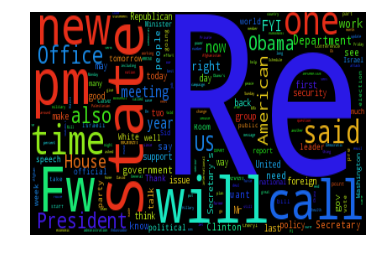

In [28]:
text = emails_t_s.str.cat(sep=' ')
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,  aspect='auto')
plt.axis("off")
plt.show()

With the help of nltk (already available in Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.
### tokenization

In [14]:
text = emails_t_s[8]
tokens = nltk.word_tokenize(text)
tokens

['H',
 '<',
 'hrod17',
 '@',
 'clintonemail.corn',
 '>',
 'Friday',
 ',',
 'March',
 '11',
 ',',
 '2011',
 '1:36',
 'PM',
 'Huma',
 'Abedin',
 'Fw',
 ':',
 'H',
 ':',
 'Latest',
 ':',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 '...',
 'Sid',
 'hrc',
 'memo',
 'Syria',
 'aiding',
 'libya',
 '030311.docx',
 'Pis',
 'print',
 '.']

### stop-words and normalization

In [15]:
stopset = set(stopwords.words('english'))
stopset

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

In [16]:
for i in np.arange(len(tokens)):
    if tokens[i] == '<':
        while not tokens[i] == '>':
            tokens[i]=''
            i = i+1
tokens

['H',
 '',
 '',
 '',
 '',
 '>',
 'Friday',
 ',',
 'March',
 '11',
 ',',
 '2011',
 '1:36',
 'PM',
 'Huma',
 'Abedin',
 'Fw',
 ':',
 'H',
 ':',
 'Latest',
 ':',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 '...',
 'Sid',
 'hrc',
 'memo',
 'Syria',
 'aiding',
 'libya',
 '030311.docx',
 'Pis',
 'print',
 '.']

In [17]:
stopset.update(['fw','am','pm','fvv','fwd','re','monday','tuesday',
                'wednesday','thursday','friday','saturday','sunday','january','february',
               'march','april','may','june','jully','august',
               'september','october','november','december'])
clean_tokens = []
puncts=['.',':','!','?','-','_','\'','``']

for token in tokens:
     if token.lower() not in stopset:
            word = token
            for sym in puncts:
                word= word.replace(sym,'')
            if len(word)>1:
                clean_tokens.append(word)

In [18]:
clean_tokens

['11',
 '2011',
 '136',
 'Huma',
 'Abedin',
 'Latest',
 'Syria',
 'aiding',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'Syria',
 'aiding',
 'libya',
 '030311docx',
 'Pis',
 'print']

### lemmatization

In [19]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in clean_tokens]

In [20]:
lemmatized_tokens

['11',
 '2011',
 '136',
 'Huma',
 'Abedin',
 'Latest',
 'Syria',
 'aiding',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'Syria',
 'aiding',
 'libya',
 '030311docx',
 'Pis',
 'print']

### stemming

In [21]:
porter_stemmer = PorterStemmer()
stemmed_tokens = [porter_stemmer.stem(token).lower() for token in lemmatized_tokens]

In [22]:
stemmed_tokens

['11',
 '2011',
 '136',
 'huma',
 'abedin',
 'latest',
 'syria',
 'aid',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 '030311docx',
 'pi',
 'print']

## pre-process all emails

In [29]:
def preprocess(text,stopset,puncts,wordnet_lemmatizer,porter_stemmer):
    tokens = nltk.word_tokenize(text)
    clean_tokens = []
    for token in tokens:
         if token.lower() not in stopset:
            word = token
            for sym in puncts:
                word= word.replace(sym,'')
            if len(word)>1:
                clean_tokens.append(word)
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in clean_tokens]
    stemmed_tokens = [porter_stemmer.stem(token).lower() for token in lemmatized_tokens]
    clean_text = ' '.join(stemmed_tokens)
    return clean_text
    
stopset = set(stopwords.words('english'))
stopset.update(['fw','am','pm','fvv','fwd','re','b6','clintonemail.com','hrod17',
                'clintonemail.corn','monday','tuesday',
                'wednesday','thursday','friday','saturday','sunday','january','february',
               'march','april','may','june','jully','august',
               'september','october','november','december'])
puncts=['.',':','!','?','-','_','\'','``']
wordnet_lemmatizer = WordNetLemmatizer()
porter_stemmer = PorterStemmer()    

clean_emails = [preprocess(emails_t_s.iloc[i],stopset,puncts,wordnet_lemmatizer,porter_stemmer) for i in np.arange(len(emails_t_s))]

In [30]:
clean_emails_df = pd.DataFrame(clean_emails)
filename = 'preprocessed_emails.csv'
clean_emails_df.to_csv(filename)

In [31]:
clean_emails_df.head()

,0
0,wow
1,2011 945 latest syria aid qaddafi sid hrc memo...
2,chri steven thx
3,cairo condemn final
4,11 2011 136 huma abedin latest syria aid qadda...


## New world cloud

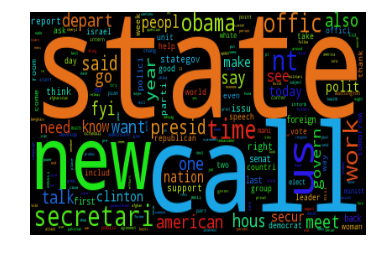

In [32]:
text = ' '.join(clean_emails)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud,  aspect='auto')
plt.axis("off")
plt.show()

In [33]:
text_file = open("preprocessed_emails.txt", "w")
text_file.write(text)
text_file.close()